In [24]:
import sys
import os
from pathlib import Path

# Adiciona o diretório raiz do projeto ao Python path
project_root = Path.cwd().parent  # Ajuste conforme sua estrutura
sys.path.append(str(project_root))

# Agora importe normalmente
from src.core.ml.leak_detection import LeakDetector

# Teste o detector
detector = LeakDetector()
print("LeakDetector importado com sucesso!")

Carregando modelo existente...
LeakDetector importado com sucesso!


In [25]:
import pandas as pd
import numpy as np

meus_dados = pd.DataFrame({
    # --- OBRIGATÓRIO ---
    'timestamp': pd.date_range(start='2024-01-01 10:00:00', end='2024-01-02 10:00:00', periods=500),
    'pressure': np.concatenate([
        np.random.normal(80, 3, 400),      # Operação normal
        np.random.normal(55, 8, 100)       # Possível vazamento
    ]),
    'flow_rate': np.concatenate([
        np.random.normal(100, 5, 400),     # Operação normal  
        np.random.normal(80, 15, 100)      # Queda de vazão
    ]),
    'temperature': np.random.normal(25, 2, 500),
    'pipeline_id': ['gasoduto_norte'] * 500,
    'location': ['estacao_compressao'] * 500,
    
    # --- OPCIONAL (melhora a detecção) ---
    'vibration': np.random.normal(5, 1.5, 500),        # Em mm/s
    'equipment_type': ['pipeline'] * 500,              # Tipo de equipamento
    'operational_status': ['normal'] * 500             # Status operacional
})

In [26]:
data_path = project_root / "data" / "synthetic" / "generated" / "gas_operation_data.parquet"

# Com caminho customizado
detector = LeakDetector(
    model_path="models/leak_detector.joblib",
    data_path=data_path
)

# Detectar vazamentos
results = detector.detect_leaks_batch(meus_dados)

# Avaliar modelo
metrics = detector.evaluate_model()

Carregando modelo existente...
Vazamentos detectados: 0/500 (0.0%)
Carregando dados de: c:\Users\marco\OneDrive\Área de Trabalho\Hackathon\digital-twin-gas\backend\data\synthetic\generated\gas_operation_data.parquet
Dados carregados: 50000 amostras
Feature pressure_drop não encontrada, preenchida com 0
Feature flow_variation não encontrada, preenchida com 0
Feature temp_change não encontrada, preenchida com 0
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       800
           1       0.00      0.00      0.00       200

    accuracy                           0.80      1000
   macro avg       0.40      0.50      0.44      1000
weighted avg       0.64      0.80      0.71      1000



c:\Users\marco\OneDrive\Área de Trabalho\Felipe\VENTURI\SOFTWARE\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\marco\OneDrive\Área de Trabalho\Felipe\VENTURI\SOFTWARE\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\marco\OneDrive\Área de Trabalho\Felipe\VENTURI\SOFTWARE\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` par

In [28]:
results

,timestamp,pressure,flow_rate,temperature,pipeline_id,location,vibration,equipment_type,operational_status,pressure_drop,flow_variation,temp_change,hour,day_of_week,leak_prediction,leak_probability,leak_alert
0,2024-01-01 10:00:00.000000000,86.133278,89.292446,28.146834,gasoduto_norte,estacao_compressao,3.897990,pipeline,normal,0.000000,0.000000,0.000000,10,0,0,0.02,False
1,2024-01-01 10:02:53.146292585,78.840487,99.287993,22.868448,gasoduto_norte,estacao_compressao,1.757449,pipeline,normal,-7.292790,0.111942,-5.278386,10,0,0,0.07,False
2,2024-01-01 10:05:46.292585170,78.932731,94.939656,24.392153,gasoduto_norte,estacao_compressao,5.899881,pipeline,normal,0.092244,-0.043795,1.523705,10,0,0,0.03,False
3,2024-01-01 10:08:39.438877755,79.028777,95.077599,26.035423,gasoduto_norte,estacao_compressao,5.612593,pipeline,normal,0.096046,0.001453,1.643270,10,0,0,0.05,False
4,2024-01-01 10:11:32.585170340,83.912586,101.116858,27.089150,gasoduto_norte,estacao_compressao,1.686859,pipeline,normal,4.883809,0.063519,1.053727,10,0,0,0.14,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2024-01-02 09:48:27.414829659,77.125037,79.589075,24.544431,gasoduto_norte,estacao_compressao,6.668625,pipeline,normal,24.721104,-0.022534,1.048653,9,1,0,0.04,False
496,2024-01-02 09:51:20.561122244,42.868445,90.829733,22.983548,gasoduto_norte,estacao_compressao,5.811305,pipeline,normal,-34.256592,0.141234,-1.560884,9,1,0,0.00,False
497,2024-01-02 09:54:13.707414829,52.946534,99.624821,24.937636,gasoduto_norte,estacao_compressao,6.380433,pipeline,normal,10.078089,0.096830,1.954088,9,1,0,0.08,False
498,2024-01-02 09:57:06.853707414,49.144872,101.946579,26.679345,gasoduto_norte,estacao_compressao,7.416836,pipeline,normal,-3.801662,0.023305,1.741709,9,1,0,0.04,False


Vazamentos detectados: 0
Probabilidade média: nan%


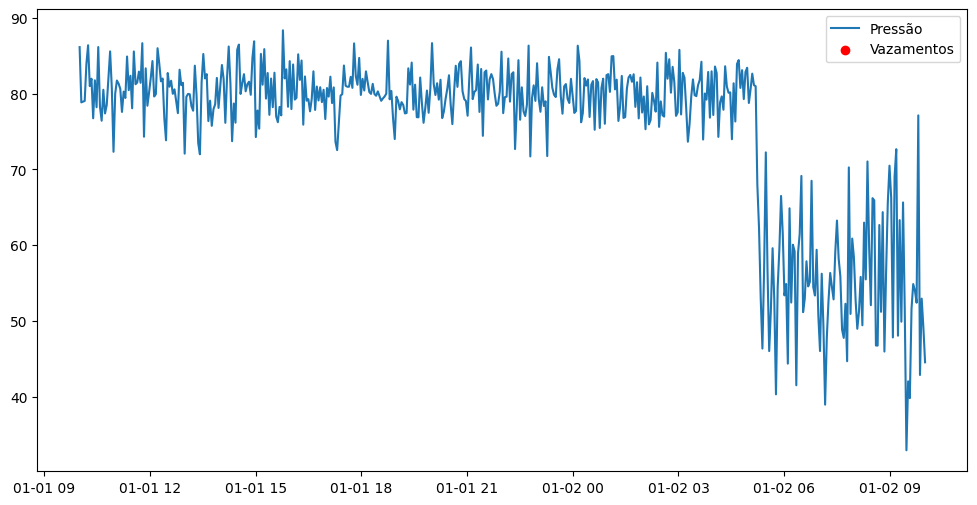

In [27]:
# Analisa os resultados
vazamentos = results[results['leak_alert'] == True]
print(f"Vazamentos detectados: {len(vazamentos)}")
print(f"Probabilidade média: {vazamentos['leak_probability'].mean():.1%}")

# Visualiza os resultados
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(results['timestamp'], results['pressure'], label='Pressão')
plt.scatter(vazamentos['timestamp'], vazamentos['pressure'], color='red', label='Vazamentos')
plt.legend()
plt.show()